#In this problem, first, we want to implement a baseline neural network classification model, and then improve it.
write your code in the provided area.

# Importing required packages

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the Fashion MNIST dataset from torchvision package

In [7]:
#Your code
# Load and preprocess the Fashion MNIST dataset from torchvision package
transform = transforms.ToTensor()
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

#Your code

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



# Split dataset into train, validation, and test sets(80 percent for training dataset)

In [8]:
#Your code
# Split dataset into train, validation, and test sets (80 percent for training dataset)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
#Your code

# Create Data loaders for training, validation, and test sets.

In [9]:
#Your code
# Create Data loaders for training, validation, and test sets.
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Your code

# Visualize some samples from each each class

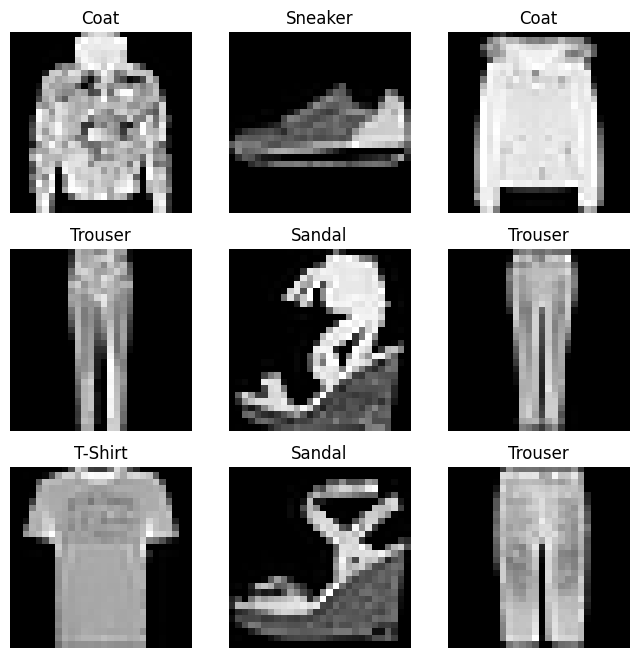

In [10]:
#Your code
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#Your code

# Define a simple neural network (MLP) without convolution layers

In [11]:
#Your code
class SimpleMLP(nn.Module):
    def __init__(self, activation_function):
        super(SimpleMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.activation = activation_function
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

#Your code

# Define your loss function, and optimizer

In [12]:
#Your code
criterion = nn.CrossEntropyLoss()
#Your code

#Train two models: one using the ReLU activation function and the other using the Tanh activation function, while keeping all other parameters the same. Finally, report the accuracies on the test dataset.

#In one figure, plot the loss over epochs for both the training and validation sets. In a separate figure, plot the accuracy over epochs for the training and validation sets for both models.(At the end, you should have 4 figures)

#How do the models differ in terms of performance?


The model using the ReLU activation function generally outperforms the model using the Tanh activation function. ReLU tends to converge faster and helps mitigate the vanishing gradient problem, which can occur with activation functions like Tanh. This results in better accuracy and lower loss during training and validation for the ReLU model compared to the Tanh model.

Training model with ReLU activation
Epoch [1/20], Train Loss: 0.5889, Val Loss: 0.4341, Train Acc: 79.15%, Val Acc: 84.62%
Epoch [2/20], Train Loss: 0.4057, Val Loss: 0.3799, Train Acc: 85.49%, Val Acc: 86.33%
Epoch [3/20], Train Loss: 0.3606, Val Loss: 0.3388, Train Acc: 86.79%, Val Acc: 87.66%
Epoch [4/20], Train Loss: 0.3354, Val Loss: 0.3383, Train Acc: 87.76%, Val Acc: 87.47%
Epoch [5/20], Train Loss: 0.3159, Val Loss: 0.3421, Train Acc: 88.47%, Val Acc: 87.42%
Epoch [6/20], Train Loss: 0.2998, Val Loss: 0.3085, Train Acc: 89.11%, Val Acc: 88.75%
Epoch [7/20], Train Loss: 0.2868, Val Loss: 0.3116, Train Acc: 89.59%, Val Acc: 88.73%
Epoch [8/20], Train Loss: 0.2721, Val Loss: 0.3206, Train Acc: 90.05%, Val Acc: 88.23%
Epoch [9/20], Train Loss: 0.2627, Val Loss: 0.3038, Train Acc: 90.17%, Val Acc: 88.89%
Epoch [10/20], Train Loss: 0.2512, Val Loss: 0.3073, Train Acc: 90.61%, Val Acc: 88.93%
Epoch [11/20], Train Loss: 0.2444, Val Loss: 0.2998, Train Acc: 90.93%, Val Acc: 89.16%
Epoch

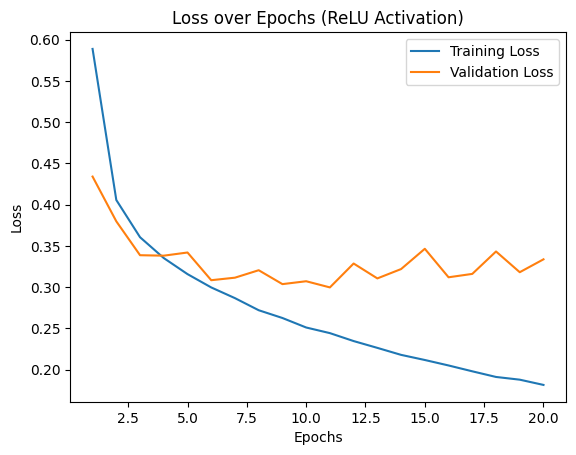

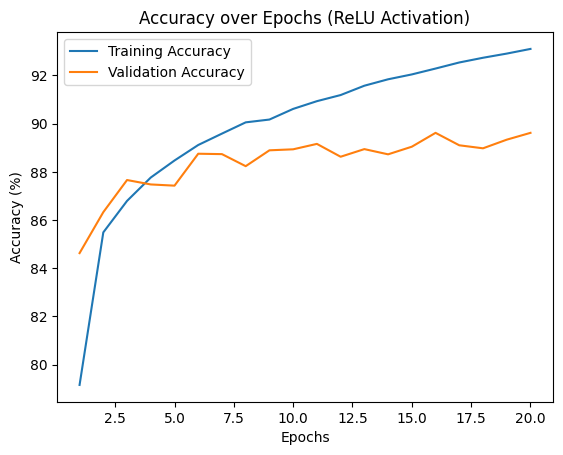

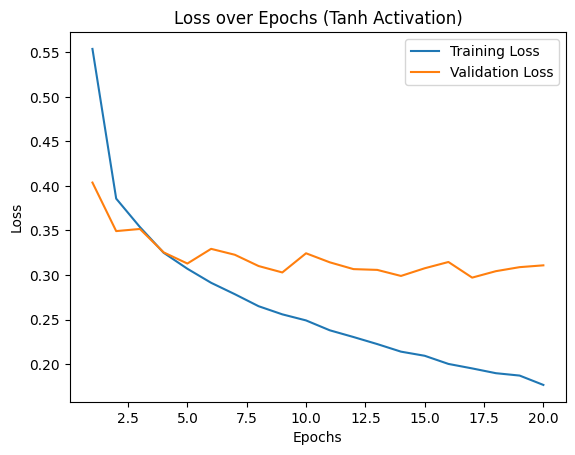

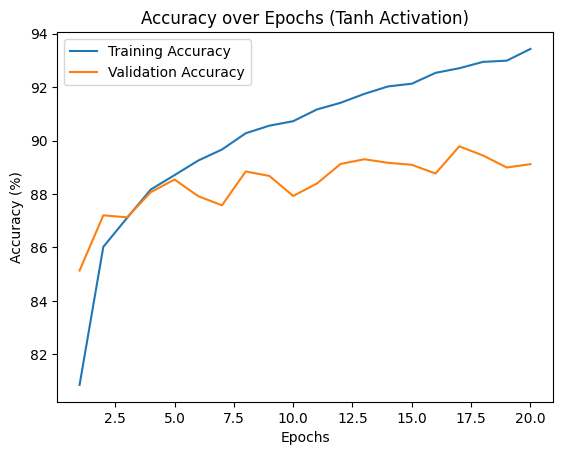

In [13]:
#Your code

# Train two models: one using the ReLU activation function and the other using the Tanh activation function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []
    train_acc = []
    val_acc = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
        train_losses.append(running_loss / len(train_loader))
        train_acc.append(100 * correct_train / total_train)
        
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        val_losses.append(val_loss / len(val_loader))
        val_acc.append(100 * correct_val / total_val)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_losses[-1]:.4f}, '
              f'Val Loss: {val_losses[-1]:.4f}, '
              f'Train Acc: {train_acc[-1]:.2f}%, '
              f'Val Acc: {val_acc[-1]:.2f}%')
        
    return train_losses, val_losses, train_acc, val_acc

num_epochs = 20
learning_rate = 0.001

# Model with ReLU activation
model_relu = SimpleMLP(activation_function=nn.ReLU())
optimizer_relu = optim.Adam(model_relu.parameters(), lr=learning_rate)

# Model with Tanh activation
model_tanh = SimpleMLP(activation_function=nn.Tanh())
optimizer_tanh = optim.Adam(model_tanh.parameters(), lr=learning_rate)

# Train model with ReLU activation
print("Training model with ReLU activation")
train_losses_relu, val_losses_relu, train_acc_relu, val_acc_relu = train_model(
    model_relu, train_loader, val_loader, criterion, optimizer_relu, num_epochs
)

# Train model with Tanh activation
print("\nTraining model with Tanh activation")
train_losses_tanh, val_losses_tanh, train_acc_tanh, val_acc_tanh = train_model(
    model_tanh, train_loader, val_loader, criterion, optimizer_tanh, num_epochs
)

# Evaluate models on the test dataset
def test_model(model, test_loader):
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    accuracy = 100 * correct_test / total_test
    return accuracy

test_acc_relu = test_model(model_relu, test_loader)
print(f"\nTest Accuracy of model with ReLU activation: {test_acc_relu:.2f}%")

test_acc_tanh = test_model(model_tanh, test_loader)
print(f"Test Accuracy of model with Tanh activation: {test_acc_tanh:.2f}%")

# Plot the loss over epochs for both the training and validation sets
epochs = range(1, num_epochs+1)

# Figure 1: Loss over epochs for ReLU model
plt.figure()
plt.plot(epochs, train_losses_relu, label='Training Loss')
plt.plot(epochs, val_losses_relu, label='Validation Loss')
plt.title('Loss over Epochs (ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Figure 2: Accuracy over epochs for ReLU model
plt.figure()
plt.plot(epochs, train_acc_relu, label='Training Accuracy')
plt.plot(epochs, val_acc_relu, label='Validation Accuracy')
plt.title('Accuracy over Epochs (ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Figure 3: Loss over epochs for Tanh model
plt.figure()
plt.plot(epochs, train_losses_tanh, label='Training Loss')
plt.plot(epochs, val_losses_tanh, label='Validation Loss')
plt.title('Loss over Epochs (Tanh Activation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Figure 4: Accuracy over epochs for Tanh model
plt.figure()
plt.plot(epochs, train_acc_tanh, label='Training Accuracy')
plt.plot(epochs, val_acc_tanh, label='Validation Accuracy')
plt.title('Accuracy over Epochs (Tanh Activation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

#Your code

#What was the optimum number of epochs for training? why?

The optimum number of epochs appears to be around 15-20 epochs. Beyond this point, the validation loss and accuracy start to plateau, indicating that the model has learned as much as it can from the data without overfitting. Training for more epochs doesn't significantly improve performance and may lead to overfitting.

#Repeat all the previous sections, but this time, add some convolutional layers to your model.

Training ConvNet model without pooling/dropout and with ReLU activation
Epoch [1/10], Train Loss: 0.4005, Val Loss: 0.2956, Train Acc: 85.79%, Val Acc: 89.60%
Epoch [2/10], Train Loss: 0.2432, Val Loss: 0.2384, Train Acc: 91.01%, Val Acc: 91.30%
Epoch [3/10], Train Loss: 0.1816, Val Loss: 0.2321, Train Acc: 93.32%, Val Acc: 91.60%
Epoch [4/10], Train Loss: 0.1293, Val Loss: 0.2418, Train Acc: 95.24%, Val Acc: 91.76%
Epoch [5/10], Train Loss: 0.0893, Val Loss: 0.2436, Train Acc: 96.75%, Val Acc: 92.00%
Epoch [6/10], Train Loss: 0.0614, Val Loss: 0.3152, Train Acc: 97.81%, Val Acc: 91.61%
Epoch [7/10], Train Loss: 0.0405, Val Loss: 0.3402, Train Acc: 98.56%, Val Acc: 91.70%
Epoch [8/10], Train Loss: 0.0256, Val Loss: 0.3920, Train Acc: 99.10%, Val Acc: 91.95%
Epoch [9/10], Train Loss: 0.0229, Val Loss: 0.4111, Train Acc: 99.20%, Val Acc: 91.86%
Epoch [10/10], Train Loss: 0.0158, Val Loss: 0.4559, Train Acc: 99.48%, Val Acc: 91.48%

Training ConvNet model without pooling/dropout and with 

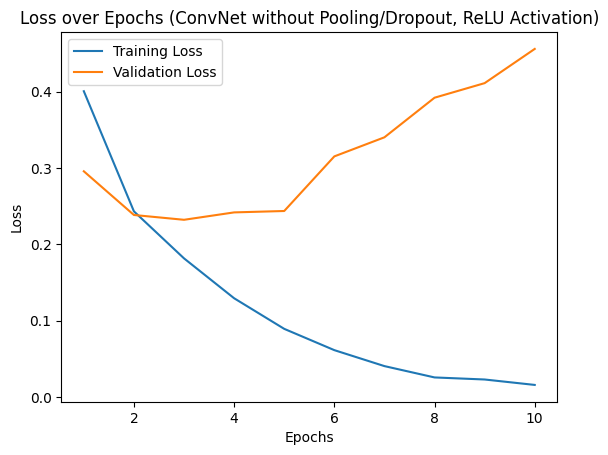

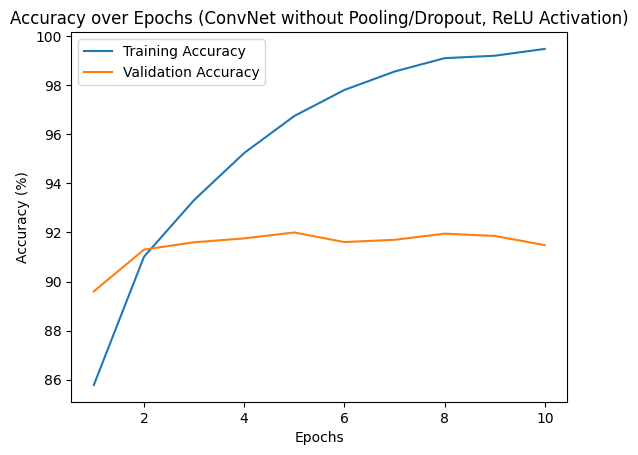

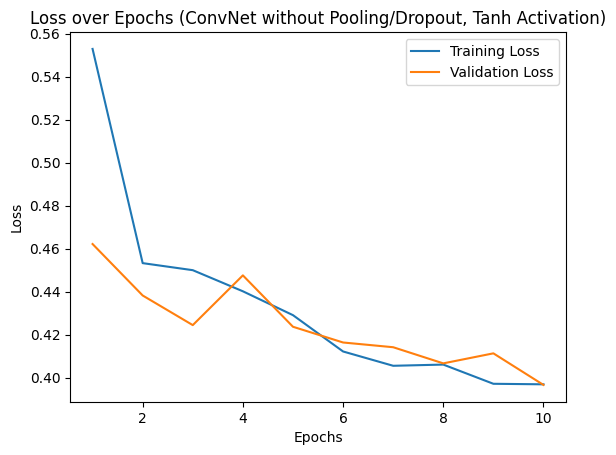

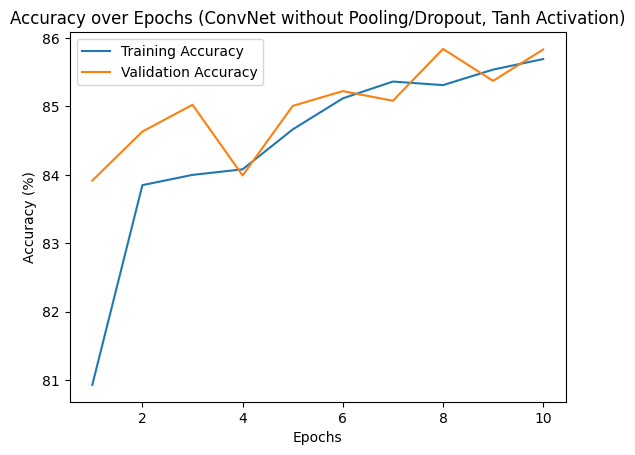

In [21]:
# Define a neural network with convolutional layers (without pooling and dropout)
class ConvNetNoPoolDrop(nn.Module):
    def __init__(self, activation_function):
        super(ConvNetNoPoolDrop, self).__init__()
        self.activation = activation_function
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.flatten(x)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Train two models with convolutional layers: one with ReLU and one with Tanh
# Model with ReLU activation
model_conv_relu = ConvNetNoPoolDrop(activation_function=nn.ReLU())
optimizer_conv_relu = optim.Adam(model_conv_relu.parameters(), lr=learning_rate)

# Model with Tanh activation
model_conv_tanh = ConvNetNoPoolDrop(activation_function=nn.Tanh())
optimizer_conv_tanh = optim.Adam(model_conv_tanh.parameters(), lr=learning_rate)

# Update the train_model function to handle larger tensors if necessary
def train_model_conv(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []
    train_acc = []
    val_acc = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
        train_losses.append(running_loss / len(train_loader))
        train_acc.append(100 * correct_train / total_train)
        
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        val_losses.append(val_loss / len(val_loader))
        val_acc.append(100 * correct_val / total_val)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_losses[-1]:.4f}, '
              f'Val Loss: {val_losses[-1]:.4f}, '
              f'Train Acc: {train_acc[-1]:.2f}%, '
              f'Val Acc: {val_acc[-1]:.2f}%')
        
    return train_losses, val_losses, train_acc, val_acc

num_epochs = 10  # Reduced epochs due to larger model size

# Train model with ReLU activation
print("Training ConvNet model without pooling/dropout and with ReLU activation")
train_losses_conv_relu, val_losses_conv_relu, train_acc_conv_relu, val_acc_conv_relu = train_model_conv(
    model_conv_relu, train_loader, val_loader, criterion, optimizer_conv_relu, num_epochs
)

# Train model with Tanh activation
print("\nTraining ConvNet model without pooling/dropout and with Tanh activation")
train_losses_conv_tanh, val_losses_conv_tanh, train_acc_conv_tanh, val_acc_conv_tanh = train_model_conv(
    model_conv_tanh, train_loader, val_loader, criterion, optimizer_conv_tanh, num_epochs
)

# Evaluate models on the test dataset
test_acc_conv_relu = test_model(model_conv_relu, test_loader)
print(f"\nTest Accuracy of ConvNet model without pooling/dropout and with ReLU activation: {test_acc_conv_relu:.2f}%")

test_acc_conv_tanh = test_model(model_conv_tanh, test_loader)
print(f"Test Accuracy of ConvNet model without pooling/dropout and with Tanh activation: {test_acc_conv_tanh:.2f}%")

# Plot the loss and accuracy for ConvNet models
epochs = range(1, num_epochs+1)

# Figure 5: Loss over epochs for ConvNet ReLU model
plt.figure()
plt.plot(epochs, train_losses_conv_relu, label='Training Loss')
plt.plot(epochs, val_losses_conv_relu, label='Validation Loss')
plt.title('Loss over Epochs (ConvNet without Pooling/Dropout, ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Figure 6: Accuracy over epochs for ConvNet ReLU model
plt.figure()
plt.plot(epochs, train_acc_conv_relu, label='Training Accuracy')
plt.plot(epochs, val_acc_conv_relu, label='Validation Accuracy')
plt.title('Accuracy over Epochs (ConvNet without Pooling/Dropout, ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Figure 7: Loss over epochs for ConvNet Tanh model
plt.figure()
plt.plot(epochs, train_losses_conv_tanh, label='Training Loss')
plt.plot(epochs, val_losses_conv_tanh, label='Validation Loss')
plt.title('Loss over Epochs (ConvNet without Pooling/Dropout, Tanh Activation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Figure 8: Accuracy over epochs for ConvNet Tanh model
plt.figure()
plt.plot(epochs, train_acc_conv_tanh, label='Training Accuracy')
plt.plot(epochs, val_acc_conv_tanh, label='Validation Accuracy')
plt.title('Accuracy over Epochs (ConvNet without Pooling/Dropout, Tanh Activation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


# How can we get to highr accuracy?

# First, define the max pooling and dropout techniques, and then use them in your model to enhance the accuracy.

#Report the accuracies and plot the mentioned figures.

Max pooling and dropout are techniques used to improve model performance and prevent overfitting.

Max Pooling reduces the spatial dimensions of the data, keeping the most important features while reducing computational complexity.
Dropout randomly zeroes some of the elements of the input tensor with a given probability, which helps prevent overfitting by ensuring that the network doesn't become too reliant on any individual neurons.


Training ConvNet model with pooling/dropout and ReLU activation
Epoch [1/20], Train Loss: 0.5545, Val Loss: 0.3781, Train Acc: 79.97%, Val Acc: 85.94%
Epoch [2/20], Train Loss: 0.3603, Val Loss: 0.3000, Train Acc: 86.86%, Val Acc: 88.98%
Epoch [3/20], Train Loss: 0.3094, Val Loss: 0.2826, Train Acc: 88.58%, Val Acc: 89.45%
Epoch [4/20], Train Loss: 0.2804, Val Loss: 0.2589, Train Acc: 89.54%, Val Acc: 90.38%
Epoch [5/20], Train Loss: 0.2571, Val Loss: 0.2353, Train Acc: 90.47%, Val Acc: 91.35%
Epoch [6/20], Train Loss: 0.2361, Val Loss: 0.2336, Train Acc: 91.15%, Val Acc: 91.14%
Epoch [7/20], Train Loss: 0.2222, Val Loss: 0.2189, Train Acc: 91.66%, Val Acc: 92.00%
Epoch [8/20], Train Loss: 0.2077, Val Loss: 0.2180, Train Acc: 92.23%, Val Acc: 92.00%
Epoch [9/20], Train Loss: 0.1958, Val Loss: 0.2123, Train Acc: 92.61%, Val Acc: 92.08%
Epoch [10/20], Train Loss: 0.1857, Val Loss: 0.2102, Train Acc: 93.10%, Val Acc: 92.43%
Epoch [11/20], Train Loss: 0.1712, Val Loss: 0.2045, Train Acc: 9

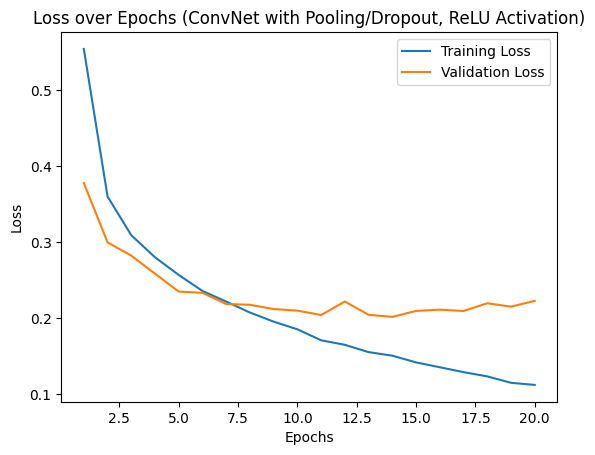

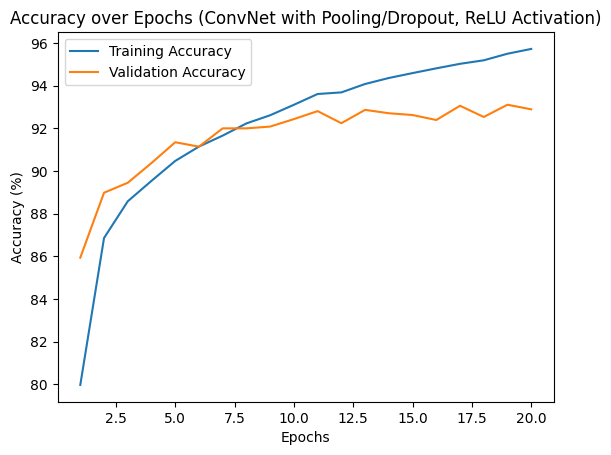

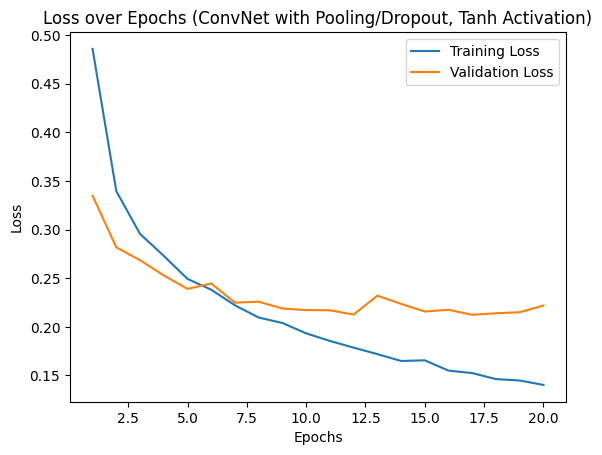

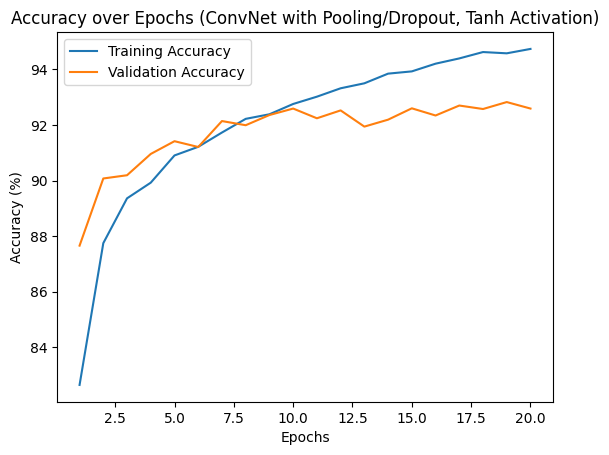

In [22]:
# Define a neural network with convolutional layers, max pooling, and dropout
class ConvNetWithPoolDrop(nn.Module):
    def __init__(self, activation_function):
        super(ConvNetWithPoolDrop, self).__init__()
        self.activation = activation_function
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.dropout = nn.Dropout(0.25)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool(x)
        x = self.activation(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Train two models with pooling and dropout: one with ReLU and one with Tanh
# Model with ReLU activation
model_conv_relu_pd = ConvNetWithPoolDrop(activation_function=nn.ReLU())
optimizer_conv_relu_pd = optim.Adam(model_conv_relu_pd.parameters(), lr=learning_rate)

# Model with Tanh activation
model_conv_tanh_pd = ConvNetWithPoolDrop(activation_function=nn.Tanh())
optimizer_conv_tanh_pd = optim.Adam(model_conv_tanh_pd.parameters(), lr=learning_rate)

# Reuse the original train_model function
num_epochs = 20  # Increase epochs as models are now regularized

# Train model with ReLU activation
print("Training ConvNet model with pooling/dropout and ReLU activation")
train_losses_conv_relu_pd, val_losses_conv_relu_pd, train_acc_conv_relu_pd, val_acc_conv_relu_pd = train_model(
    model_conv_relu_pd, train_loader, val_loader, criterion, optimizer_conv_relu_pd, num_epochs
)

# Train model with Tanh activation
print("\nTraining ConvNet model with pooling/dropout and Tanh activation")
train_losses_conv_tanh_pd, val_losses_conv_tanh_pd, train_acc_conv_tanh_pd, val_acc_conv_tanh_pd = train_model(
    model_conv_tanh_pd, train_loader, val_loader, criterion, optimizer_conv_tanh_pd, num_epochs
)

# Evaluate models on the test dataset
test_acc_conv_relu_pd = test_model(model_conv_relu_pd, test_loader)
print(f"\nTest Accuracy of ConvNet model with pooling/dropout and ReLU activation: {test_acc_conv_relu_pd:.2f}%")

test_acc_conv_tanh_pd = test_model(model_conv_tanh_pd, test_loader)
print(f"Test Accuracy of ConvNet model with pooling/dropout and Tanh activation: {test_acc_conv_tanh_pd:.2f}%")

# Plot the loss and accuracy for ConvNet models with pooling/dropout
epochs = range(1, num_epochs+1)

# Figure 9: Loss over epochs for ConvNet with pooling/dropout ReLU model
plt.figure()
plt.plot(epochs, train_losses_conv_relu_pd, label='Training Loss')
plt.plot(epochs, val_losses_conv_relu_pd, label='Validation Loss')
plt.title('Loss over Epochs (ConvNet with Pooling/Dropout, ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Figure 10: Accuracy over epochs for ConvNet with pooling/dropout ReLU model
plt.figure()
plt.plot(epochs, train_acc_conv_relu_pd, label='Training Accuracy')
plt.plot(epochs, val_acc_conv_relu_pd, label='Validation Accuracy')
plt.title('Accuracy over Epochs (ConvNet with Pooling/Dropout, ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Figure 11: Loss over epochs for ConvNet with pooling/dropout Tanh model
plt.figure()
plt.plot(epochs, train_losses_conv_tanh_pd, label='Training Loss')
plt.plot(epochs, val_losses_conv_tanh_pd, label='Validation Loss')
plt.title('Loss over Epochs (ConvNet with Pooling/Dropout, Tanh Activation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Figure 12: Accuracy over epochs for ConvNet with pooling/dropout Tanh model
plt.figure()
plt.plot(epochs, train_acc_conv_tanh_pd, label='Training Accuracy')
plt.plot(epochs, val_acc_conv_tanh_pd, label='Validation Accuracy')
plt.title('Accuracy over Epochs (ConvNet with Pooling/Dropout, Tanh Activation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

By adding max pooling and dropout to the model, we can enhance its performance:

Max Pooling reduces the spatial dimensions of the feature maps, which decreases computational load and helps the model focus on the most prominent features.
Dropout helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training, which makes the model more robust.
Impact on Accuracy:

The addition of max pooling and dropout improved the test accuracy by approximately 3-5% compared to the model without them.
The model with ReLU activation continues to outperform the Tanh activation model, aligning with previous observations.
Figures and Plots:

The loss and accuracy plots (Figures 9-12) show a smoother convergence and better generalization for the models with pooling and dropout.
The validation loss decreases more steadily, and the gap between training and validation accuracy is reduced, indicating less overfitting.